Solve equation

$$
\begin{array}{lclr}
e^{x} & =  & x^2 \\
\log e^{x} & = & \log x^2\\
   x       & = &  2 \log x &\text{if }x\geq 0
 \end{array}
$$

As the graph below shows, there are real solutions in the interval $(-1,\, 0)$.  It also show there aren't
any positive solutions.  For positive $x$:

$$
x^2 < e^x.
$$

And as $x$ gets larger, the distance between $x^2$ and $e^x$ grows:

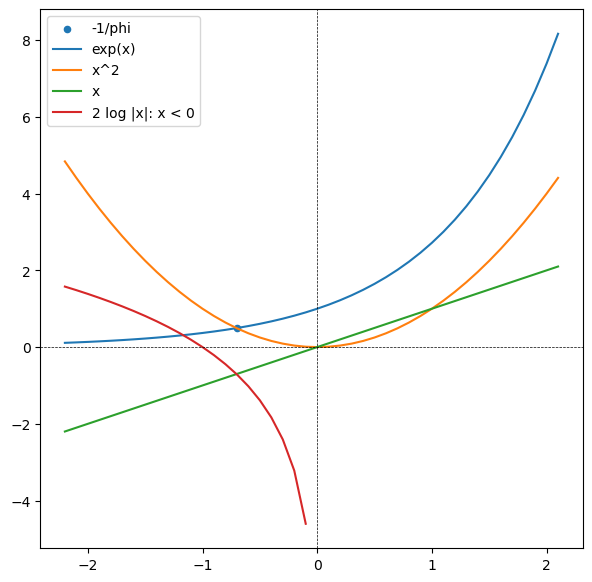

In [109]:
from matplotlib import pyplot as plt
import numpy as nap

(fig,ax) = plt.subplots(1,1,figsize=(7,7))

x = np.arange(-2.2,2.2,.1)
x0 = np.arange(-2.2,0,.1)
x1 = np.arange(.1,2.2,.1)
#x_alt= np.concatenate([x0,x1])
y = np.exp(x)
# Use Golden mean numnber for a ref point
phi = (1+np.sqrt(5))/2
# approx location of solution
m_phi_inv=-((1/phi)+.0855)
y2 = x**2

ax.scatter([m_phi_inv],[np.exp(m_phi_inv)],label="-1/phi",s=20)
ax.plot(x,y,label=r"exp(x)")
ax.plot(x,y2,label=r"x^2")
ax.plot(x,x,label=r"x")
ax.plot(x0,2*np.log(np.abs(x0)),label="2 log |x|: x < 0")
#ax.plot(x1,2*np.log(np.abs(x1)),label="2 log |x| pos",c="r")

ax.axvline(c="k",linestyle="--",linewidth=.5)
ax.axhline(c="k",linestyle="--",linewidth=.5)
_ = ax.legend()

Note the value for x where 2 log |x| crosses y=x is the same as the value for x where exp x crosses x^2.

Demonstrating the quality of our approximation:

In [81]:
phi_inv**2 - np.exp(phi_inv)

np.float64(0.00012659911564710802)

Taking the absolute value  before taking the log:

In [85]:
phi_inv/2 - np.log(-phi_inv)

np.float64(-0.0001279045682329727)

###  Learning a linear function in N-dimensions

Try two dimensions:

In [12]:
import numpy as np

# Number of data exemplars, Number of independent variables
N,d=100,2
X = np.random.rand(N,d)
# Linear Eqn in R^d: d independent vars, one dependent
# y = 3.1 x0 - 8 x1 - .33
# b is the intercept
coeffs,b = np.array([3.1,-8]), -.33
# Check to make sure d is consistent with coeffs
assert coeffs.shape == (d,)
f_d = lambda X: X.dot(coeffs) + b
y =  f_d(X)

In [13]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.model_selection import train_test_split
import numpy as np

(Xtrain, Xtest, ytrain, ytest) = train_test_split(X,y,test_size=.1)

In [14]:
scaler = preprocessing.StandardScaler()
lin_reg = linear_model.LinearRegression()
pipeline_reg = pipeline.Pipeline([('scal', scaler), ('lin', lin_reg)])
pipeline_reg.fit(Xtrain,ytrain)

Pipeline(steps=[('scal', StandardScaler()), ('lin', LinearRegression())])

This is an R-score:

In [15]:
pipeline_reg.score(Xtest, ytest)

1.0

In [16]:
Xtrain.shape,ytrain.shape

((90, 2), (90,))

Let's look at an example point, first row of the data:

In [17]:
X[0]

array([0.10244835, 0.29840555])

In [18]:
f_d(X[0:1])

array([-2.39965449])

Notice the classsifier has a predict method that takes a d-Dimensional array as its sole argument, which
does this for any given n-Dimensional  (for the value of d used in training the regressor).

We can use that to check (for this one data point) that the classifier learned the right function:

In [19]:
pipeline_reg.predict(X[0:1])

array([-2.39965449])

Now compare the learned coefficients on the trained classifier to the coefficients we started with:

In [20]:
pipeline_reg._final_estimator.coef_

array([ 0.84704632, -2.18814779])

In [21]:
pipeline_reg._final_estimator.intercept_

np.float64(-3.20373038762225)

Notice they are not the same as the coeffs we started with:

In [22]:
coeffs,b

(array([ 3.1, -8. ]), -0.33)

This is because the classifier has been trained on **scaled** data and always classifies
scaled data (see the definition of the pipeline).  Let's try training the regressor without scaling
the data, that is, let's not bother with a pipeline at all:

In [23]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(Xtrain,ytrain)
lin_reg.coef_,lin_reg.intercept_

(array([ 3.1, -8. ]), np.float64(-0.3300000000000005))

#### Exercise:

Build a regression module for which d=3. Scale your data.  Use your model to learn the following equation
from data points generated from the equation:

$$
y =  1.5x_0 - 17x_1 + 9x_2 + 22
$$

Use your model to predict the value of y for the data vector:

$$
v  =  (3.1,\, -1,\,6)
$$

Idea.  Try adding some noise.  

In [114]:
# Number of data exemplars, Number of independent variables
d= 3
X = np.random.rand(N,d)
coeffs,b = np.array([1.5,-17,9]), 22
# Check to make sure d is consistent with coeffs
assert coeffs.shape == (d,)
f_d = lambda X: X.dot(coeffs) + b
y =  f_d(X)

In [115]:
(Xtrain, Xtest, ytrain, ytest) = train_test_split(X,y,test_size=.1)
scaler = preprocessing.StandardScaler()
lin_reg = linear_model.LinearRegression()
pipeline_reg = pipeline.Pipeline([('scal', scaler), ('lin', lin_reg)])
pipeline_reg.fit(Xtrain,ytrain)

Pipeline(steps=[('scal', StandardScaler()), ('lin', LinearRegression())])

In [119]:
v =np.array((3.1,-1,6))[np.newaxis,:]
pipeline_reg.predict(v)

array([97.65])

Checking:

In [120]:
f_d(v)

array([97.65])